In [68]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.simplefilter('ignore')
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Read the dataset and understand the features and target variable.

In [69]:
colnames = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk','Class']

Df = pd.read_csv("Qualitative_Bankruptcy.data.txt",delimiter=',', names= colnames)


In [70]:
Df.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [71]:
Df.shape

(250, 7)

In [72]:
Df['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [73]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [74]:
Df.isnull().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

In [75]:
Df.columns

Index(['Industrial Risk', 'Management Risk', 'Financial Flexibility',
       'Credibility', 'Competitiveness', 'Operating Risk', 'Class'],
      dtype='object')

 ### Encode independent features

In [76]:
var = ['Industrial Risk', 'Management Risk', 'Financial Flexibility','Credibility', 'Competitiveness', 'Operating Risk', 'Class']

In [77]:
def func_labelEncoder(var,features):
    encode= LabelEncoder()
    features[var] = encode.fit_transform(features[var].astype(str))
    
for i in var:
    func_labelEncoder(i,Df)

In [78]:
Df.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1
5,0,0,2,2,2,0,1
6,2,2,0,2,2,2,1
7,2,2,2,0,0,2,1
8,2,2,0,2,0,2,1
9,2,2,0,0,2,2,1


In [79]:
Df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.996000,0.972000,0.932000,1.008000,1.140000,1.088000,0.572000
std,0.804096,0.724788,0.722123,0.791481,0.755435,0.733764,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [80]:
Df.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573,0.015836
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851,0.100632
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455,-0.047966
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104,0.152045
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031,0.203521
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000,0.159147
Class,0.015836,0.100632,-0.047966,0.152045,0.203521,0.159147,1.000000


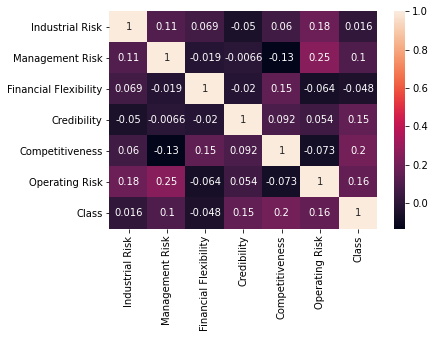

In [81]:
sns.heatmap(Df.corr(),annot= True)

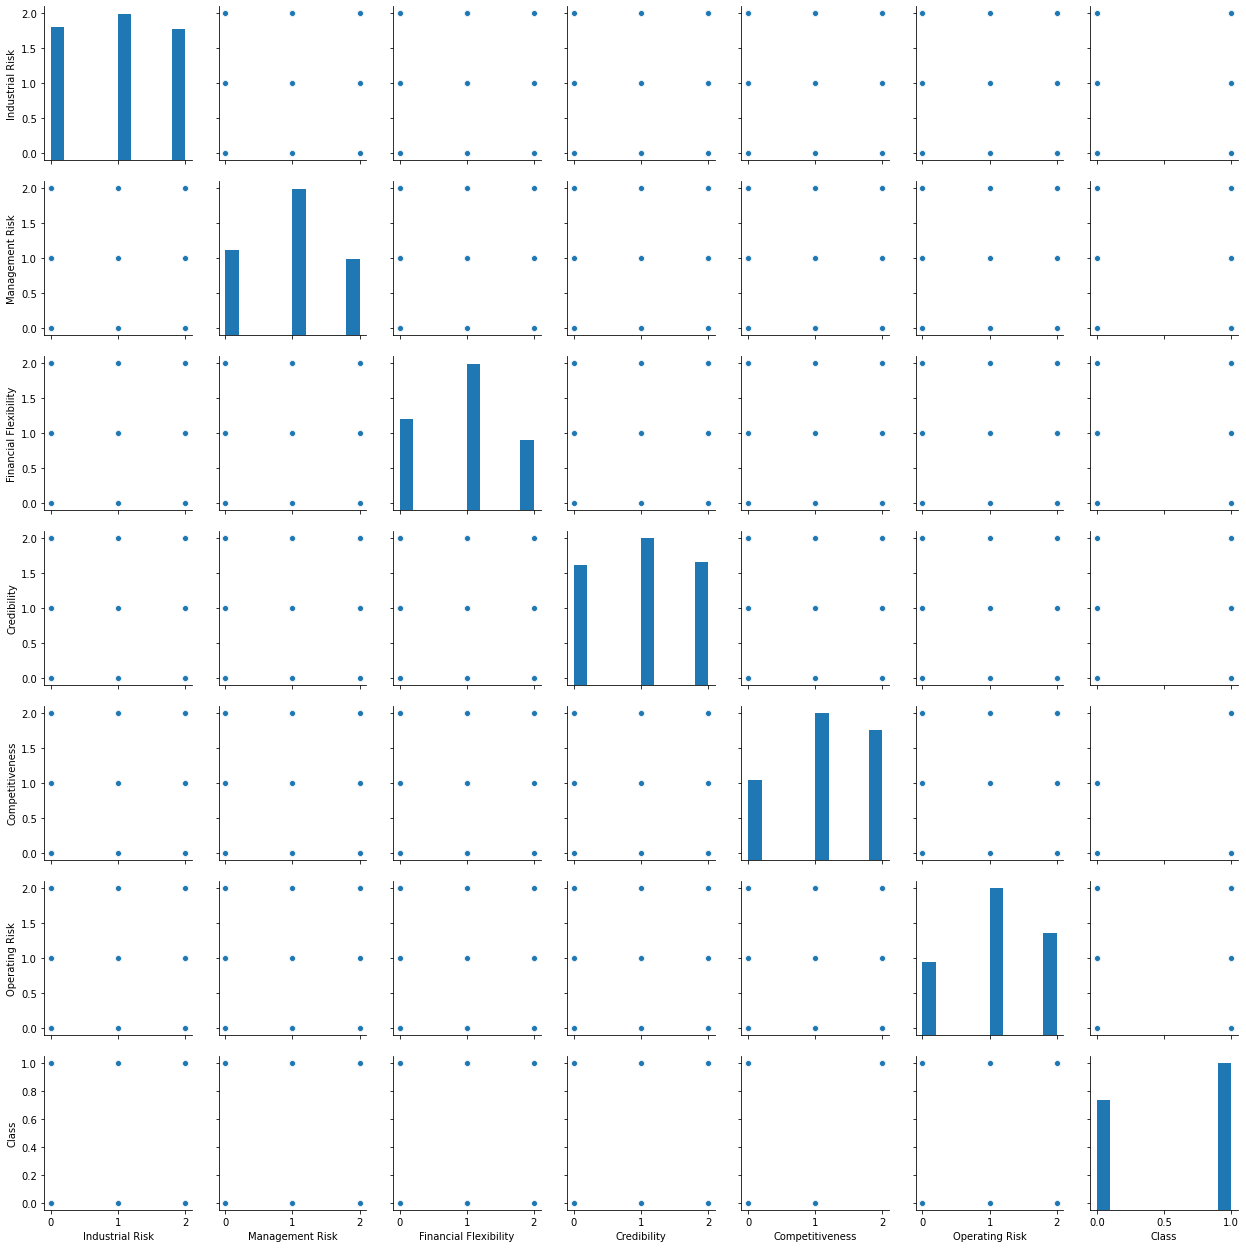

In [82]:
sns.pairplot(Df)

### Separate the dependent variable (class) from the data

In [83]:
data = Df.drop('Class',axis=1)

In [84]:
data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


### Check distribution of target column and independent features and comment your findings

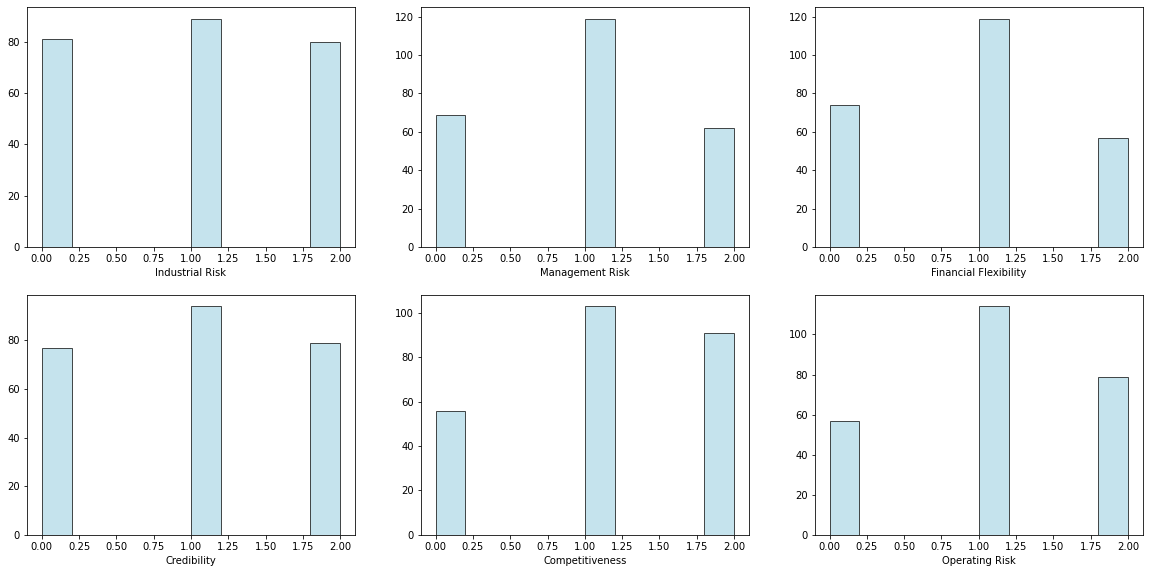

In [85]:
#Plots to see the distribution of the  features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data['Industrial Risk'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Industrial Risk')

plt.subplot(3,3,2)
plt.hist(data['Management Risk'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Management Risk')

plt.subplot(3,3,3)
plt.hist(data['Financial Flexibility'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Financial Flexibility')

plt.subplot(3,3,4)
plt.hist(data['Credibility'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Credibility')

plt.subplot(3,3,5)
plt.hist(data['Competitiveness'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Competitiveness')

plt.subplot(3,3,6)
plt.hist(data['Operating Risk'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Operating Risk')

plt.show()

Text(0.5, 0, 'Class')

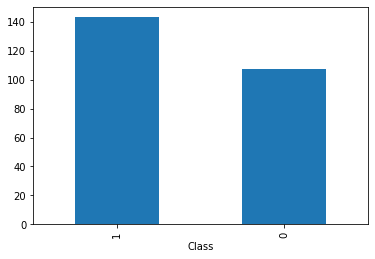

In [86]:
pd.value_counts(Df["Class"]).plot(kind="bar")
plt.xlabel('Class')

#### Observations:
   1. count of Bankruptcy is less as compare to Non-Bankruptcy values.
   2. All the independent features are having maximum count of N-negative(1)values as compare to positive & average values.

### Apply KMeans or hierarchical clustering algorithm on the above data.

In [87]:
cluster_range = range( 2, 10)  
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(data, labels, metric='euclidean'))
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,724.335632,0.154692
1,3,646.366641,0.145687
2,4,584.485097,0.162990
3,5,537.133039,0.159360
4,6,495.995389,0.186476
5,7,461.415102,0.217273
6,8,423.839090,0.230860
7,9,403.724941,0.193192


### Select optimal number of clusters and form clusters of the data.

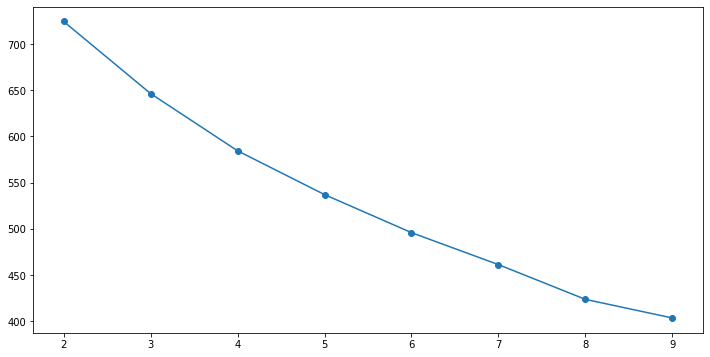

In [88]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### from the above elbow plot optimal no. of cluster is 3.

In [89]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [90]:
centroids = cluster.cluster_centers_
centroids

array([[ 8.75000000e-01,  1.46875000e+00,  1.25000000e-01,
         1.09375000e+00, -4.44089210e-16,  1.68750000e+00],
       [ 1.72448980e+00,  9.28571429e-01,  1.16326531e+00,
         1.09183673e+00,  1.34693878e+00,  1.34693878e+00],
       [ 4.33333333e-01,  8.75000000e-01,  9.58333333e-01,
         9.16666667e-01,  1.27500000e+00,  7.16666667e-01]])

In [91]:
centroid_df = pd.DataFrame(centroids, columns = list(data) )
centroid_df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,0.875000,1.468750,0.125000,1.093750,-4.440892e-16,1.687500
1,1.724490,0.928571,1.163265,1.091837,1.346939e+00,1.346939
2,0.433333,0.875000,0.958333,0.916667,1.275000e+00,0.716667


### Create a new column in the data and populate it with the cluster labels

In [92]:
prediction=cluster.predict(data)
data["cluster_labels"] = prediction

In [93]:
data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,cluster_labels
0,2,2,0,0,0,2,0
1,1,1,0,0,0,1,0
2,0,0,0,0,0,0,2
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [94]:
data.groupby("cluster_labels").count()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
cluster_labels,,,,,,
0,32,32,32,32,32,32
1,98,98,98,98,98,98
2,120,120,120,120,120,120


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA615D1C48>,
      dtype=object)

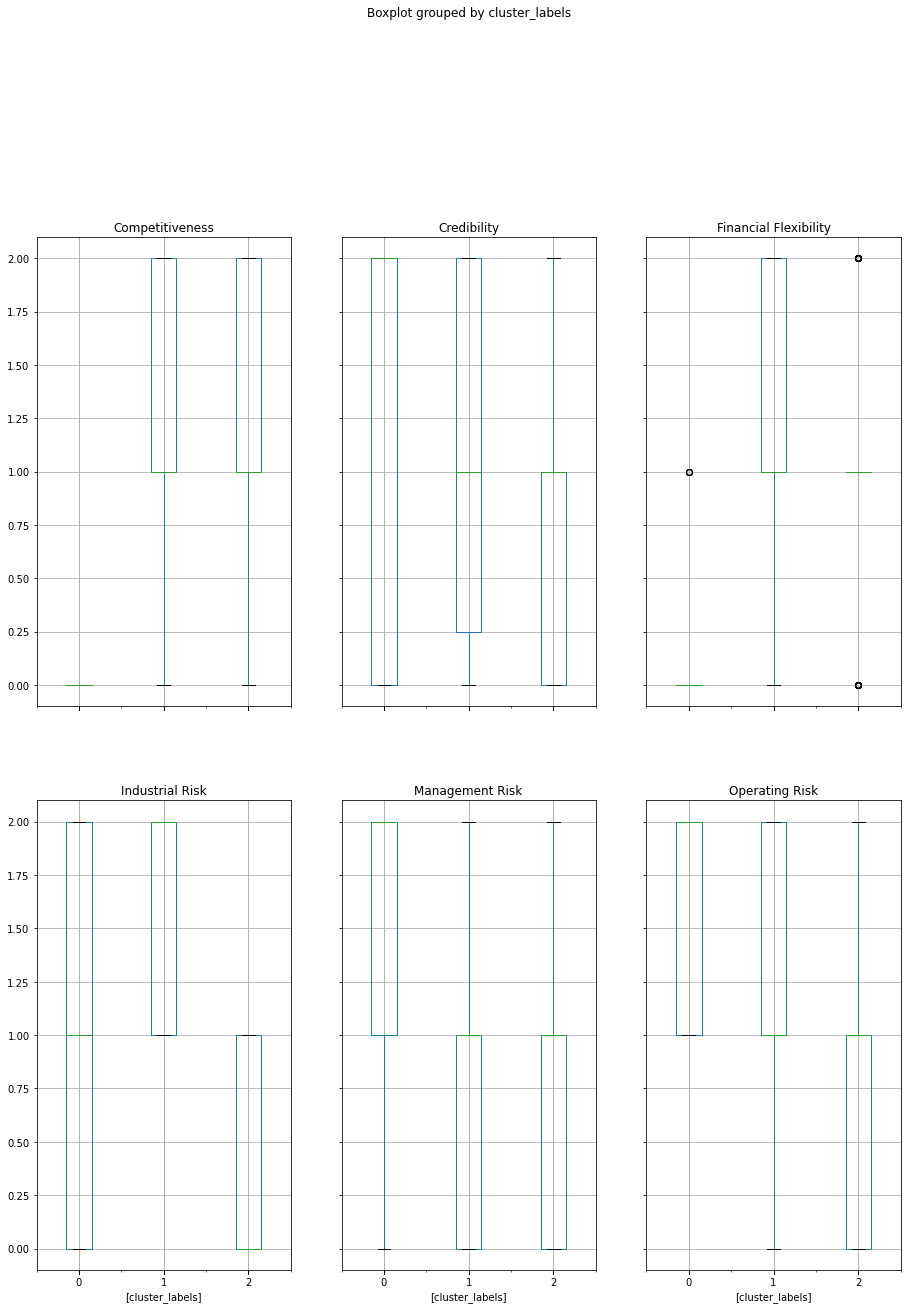

In [95]:
import matplotlib.pylab as plt

data.boxplot(by = 'cluster_labels',  layout=(4,3), figsize=(15, 40))


### Split the data into train and test set

In [96]:
X = data.drop('cluster_labels',axis=1)
Y = data.pop('cluster_labels')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=4)

### Apply SVC model on train dataset and predict target for test dataset.

In [98]:
clf = svm.SVC()    
clf.fit(X_train , y_train)
print('Training accuracy-',clf.score(X_test, y_test))
print('Testing accuracy-',clf.score(X_test, y_test))

Training accuracy- 1.0
Testing accuracy- 1.0


In [99]:
y_pred = clf.predict(X_test)

In [100]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2
cluster_labels,,,
0,12,0,0
1,0,24,0
2,0,0,39


### Check accuracy and confusion matrix

In [101]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[12  0  0]
 [ 0 24  0]
 [ 0  0 39]]


In [102]:
a = confusion_matrix.shape
correctPrediction = 0
falsePrediction = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            correctPrediction +=confusion_matrix[row,c]
        else:
            falsePrediction += confusion_matrix[row,c]
print('Correct predictions: ', correctPrediction)
print('False predictions', falsePrediction)
print ('\n\nAccuracy of the SVM is: ', correctPrediction/(confusion_matrix.sum()))


Correct predictions:  75
False predictions 0


Accuracy of the SVM is:  1.0


In [103]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        39

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

